In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 500
sns.set()

In [2]:
def func(x_i):
    if x_i[0]+x_i[1] <= 7+5*random.random():
        y = 0
    else:
        y = 1
    return y
 
def generate_data(no_points):
    X = np.zeros(shape=(no_points, 2))
    Y = np.zeros(shape=(no_points))
    for ii in range(no_points):
        X[ii][0] = random.random()*9+0.5
        X[ii][1] = random.random()*9+0.5
        Y[ii] = func(X[ii])
    return X, Y
X, Y = generate_data(300)

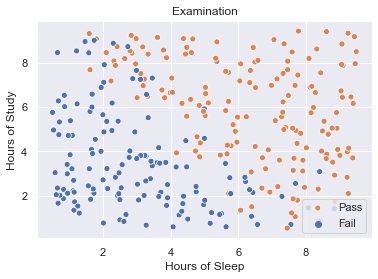

In [3]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
ax.legend(['Pass', 'Fail'])

In [4]:
def logistic(x):
    return 1/(1+np.exp(-x))

def linear(x, w, b):
    return np.dot(x, w) + b

def logistic_classifier(x, w, b):
    return logistic(linear(x,w,b))

def gradient_descent_linear(f, w, b, x, y, lr):
    h = f(x, w, b)
    w[0] -= lr*((h - y)*x[:,0]).mean()
    w[1] -= lr*((h - y)*x[:,1]).mean()
    b -= lr*(h - y).mean()
    loss = -(y*np.log(h)+(1-y)*np.log(1-h)).mean()
    return w, b, loss

In [5]:
iterations = 1000
w = np.array([1.,1.])
b = 0.
lr = 1e-1

In [6]:
loss_log = []
Y = Y.astype('float64')
for _ in range(iterations):
    w, b, loss = gradient_descent_linear(logistic_classifier, w, b, X, Y, lr)
    #print(loss)
    loss_log.append(loss)

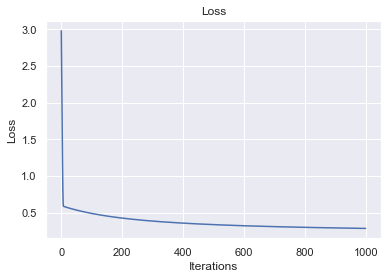

In [7]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
sns.lineplot(range(len(loss_log)), loss_log)

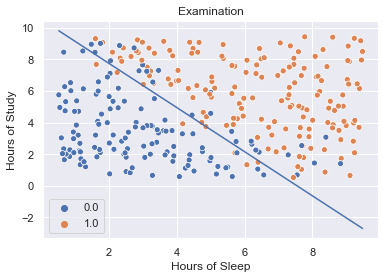

In [8]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
x_line = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
ax.legend(['Pass', 'Fail'])
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
sns.lineplot(x=x_line, y=(-w[0]*x_line-b)/w[1])